<a href="https://colab.research.google.com/github/ycyoondev/DL_zero_to_all_PyTorch/blob/master/211008_DNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.6.0


XOR 데이터

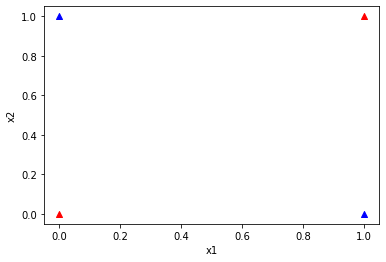

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

이전 수업에서 배운, 3개의 로지스틱 모형을 이용해서 XOR문제를 해결한다.
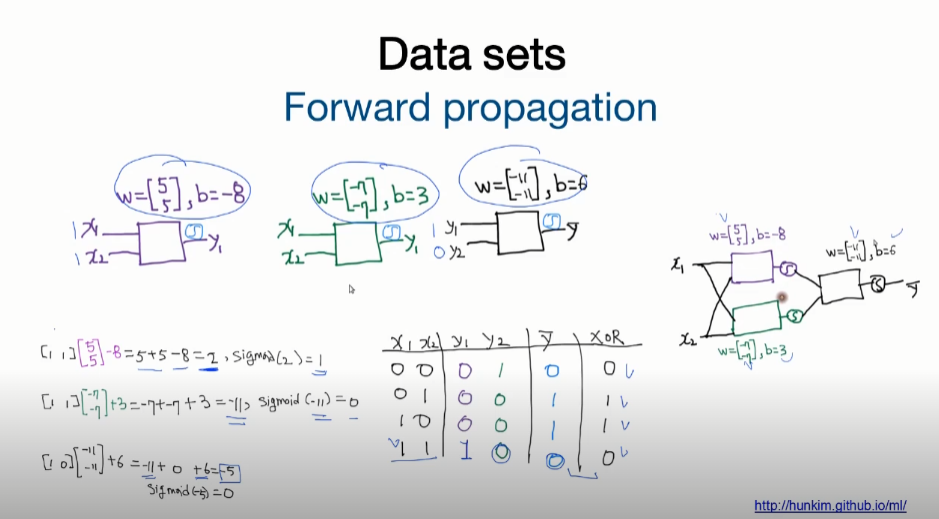

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
# 위 과정은 Tensorflow data API를 이용해 학습시킬 값을 담습니다. batch size는 한번에 학습할 size입니다. 여기선 x_data 크기입니다,


def preprocess_data(features, labels): # 학습을 위한 타입 변환입니다. (전처리)
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [4]:
# 학습 모델에 사용할 W, b 입니다. 여기서 초기값을 0으로 사용합니다.
# 초기값을 랜덤하게 줄 수 있습니다. 또한 모델에 따라 특정 초기값이 좋다는 연구들이 있습니다.
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


In [5]:
# 시그모이드 함수를 나타내면 아래와 같습니다.
# tf.sigmoid(tf.matnul(X, W) + b)로 표현할 수 있습니다.
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [6]:
# 가설을 검증할 COST 합수입니다.

def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [7]:
# sigmoid에서 반환된 값을 0.5 기준으로 0과 1로 변환합니다. (이진 분류)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [8]:
# GradientTape를 통해 경사값을 계산합니다.

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [9]:
# 위에 함수들을 이용해서 학습합니다.
# 데이터 로드 - 데이터 전처리 - 모델 설정(W, b) - 가설 선언(Sigmoid) - COST 함수 정의 - 경사하강법 정의 - 결과값 변환(0 or 1)

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:# 데이터 셋에서 하나씩 불러온다
        features, labels = preprocess_data(features, labels) # 전처리
        grads = grad(logistic_regression(features), features, labels) # 가설로 값을 구하고, 경사하강
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) # 최적화
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


## Neural Network

1개의 로지스틱 모형을 사용한 경우 위와같은 결과를 얻을 수 있었다. 이제 3개의 로지스틱 모형을 이용해 값을 구하자.

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [15]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [16]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)

In [ ]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))